### 1 - Import test data

In [1]:
import pandas as pd
import pandas_ta as ta

df = pd.read_csv(r"C:\Users\Udompan\OneDrive\Desktop\datazone\XAUUSD_GMT+2_US-DST_M1.csv")
df["Gmt time"]=df["Gmt time"].str.replace(".000","")
df['Gmt time']=pd.to_datetime(df['Gmt time'],format='%d.%m.%Y %H:%M:%S')
df=df[df.High!=df.Low]
df.set_index("Gmt time", inplace=True)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Udompan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\indexes\base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Gmt time'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\Udompan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3460, 

In [4]:
import pandas as pd
df1=pd.read_csv(r"C:\Users\Udompan\OneDrive\Desktop\datazone\XAUUSD_GMT+2_US-DST_M1.csv")
df1.head()

,2014.01.02,01:00:00,1203.612,1203.733,1202.302,1203.513,49
0,2014.01.02,01:01:00,1203.533,1204.213,1203.523,1203.842,45
1,2014.01.02,01:02:00,1203.803,1203.953,1203.333,1203.642,31
2,2014.01.02,01:03:00,1203.642,1203.842,1203.542,1203.842,11
3,2014.01.02,01:04:00,1203.942,1204.393,1203.942,1203.942,36
4,2014.01.02,01:05:00,1204.042,1204.042,1203.742,1203.943,24


In [63]:
df["EMA"]=ta.ema(df.Close, length=30)
df['RSI']=ta.rsi(df.Close, length=10)
my_bbands = ta.bbands(df.Close, length=15, std=1.5)
df['ATR']=ta.atr(df.High, df.Low, df.Close, length=7)
df=df.join(my_bbands)
df

,Open,High,Low,Close,Volume,EMA,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5
Gmt time,,,,,,,,,,,,,
2019-09-30 00:00:00,1.09425,1.09426,1.09405,1.09406,585.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30 00:05:00,1.09408,1.09414,1.09401,1.09409,289.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30 00:10:00,1.09410,1.09423,1.09408,1.09410,276.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30 00:15:00,1.09409,1.09410,1.09388,1.09389,439.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30 00:20:00,1.09390,1.09395,1.09388,1.09395,341.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30 20:35:00,0.98028,0.98034,0.98001,0.98022,624.12,0.980175,47.042955,0.000423,0.979757,0.980317,0.980877,0.114260,0.413104
2022-09-30 20:40:00,0.98023,0.98047,0.98007,0.98030,408.20,0.980183,49.010705,0.000420,0.979809,0.980344,0.980879,0.109099,0.458861
2022-09-30 20:45:00,0.98026,0.98034,0.98019,0.98031,317.29,0.980191,49.272498,0.000381,0.979943,0.980391,0.980838,0.091333,0.409912


In [64]:
# Function to compute EMA signal
def ema_signal(df, current_candle, backcandles):
    df_slice = df.reset_index().copy()
    
    # Ensure the slice does not go out of bounds
    if current_candle - backcandles < 0:
        return 0  # Return 0 or another default value if the range is out of bounds
    
    # Get a slice of the DataFrame
    df_slice = df_slice.loc[current_candle-backcandles:current_candle, ["Open", "Close", "EMA"]]

    # Check conditions for signals
    dnt = 0 if (df_slice[["Open", "Close"]].max(axis=1) >= df_slice["EMA"]).any() else 1
    upt = 0 if (df_slice[["Open", "Close"]].min(axis=1) <= df_slice["EMA"]).any() else 1

    # Return the signal based on conditions
    if upt == 1 and dnt == 1:
        return 3  # Both uptrend and downtrend
    elif upt == 1:
        return 2  # Uptrend
    elif dnt == 1:
        return 1  # Downtrend
    else:
        return 0  # No trend

# Filter the DataFrame
df = df[-10000:-1]

# Apply tqdm to the apply function to add a progress bar
tqdm.pandas()

# Reset index for the DataFrame
df.reset_index(inplace=True)

# Apply ema_signal function to each row and add the result to a new column 'EMASignal'
df['EMASignal'] = df.progress_apply(
    lambda row: ema_signal(df, row.name, 5) if row.name >= 5 else 0, axis=1
)

100%|██████████| 9999/9999 [00:14<00:00, 676.96it/s]
C:\Users\Udompan\AppData\Local\Temp\ipykernel_35612\636157323.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
def total_signal(df, current_candle, backcandles):
    if (ema_signal(df, current_candle, backcandles)==2
        and df.Close[current_candle]<=df['BBL_15_1.5'][current_candle]
        #and df.RSI[current_candle]<60
        ):
            return 2
    if (ema_signal(df, current_candle, backcandles)==1
        and df.Close[current_candle]>=df['BBU_15_1.5'][current_candle]
        #and df.RSI[current_candle]>40
        ):
    
            return 1
    return 0
        
df['TotalSignal'] = df.progress_apply(lambda row: total_signal(df, row.name, 7), axis=1)

100%|██████████| 9999/9999 [00:31<00:00, 317.96it/s]
C:\Users\Udompan\AppData\Local\Temp\ipykernel_35612\3699091765.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
df[df.TotalSignal != 0].head(10)

,Gmt time,Open,High,Low,Close,Volume,EMA,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5,EMASignal,TotalSignal
195,2022-08-15 19:25:00,1.01604,1.01622,1.01599,1.01621,623.47,1.016369,54.537906,0.000279,1.015592,1.015849,1.016107,0.050688,1.200441,1,1
293,2022-08-16 03:35:00,1.01663,1.01663,1.01640,1.01641,698.87,1.016361,46.162780,0.000240,1.016447,1.016647,1.016847,0.039376,-0.092859,2,2
294,2022-08-16 03:40:00,1.01642,1.01661,1.01630,1.01637,1161.57,1.016362,44.586991,0.000250,1.016410,1.016634,1.016858,0.044123,-0.088536,2,2
652,2022-08-17 09:35:00,1.01745,1.01761,1.01713,1.01713,1427.19,1.017122,47.561766,0.000515,1.017186,1.017533,1.017881,0.068357,-0.079871,2,2
889,2022-08-18 05:20:00,1.01699,1.01699,1.01682,1.01695,659.09,1.017154,49.819120,0.000208,1.016576,1.016751,1.016926,0.034434,1.069347,1,1
1006,2022-08-18 15:05:00,1.01308,1.01363,1.01302,1.01332,1645.71,1.013878,50.503320,0.000622,1.012089,1.012640,1.013191,0.108894,1.116665,1,1
1007,2022-08-18 15:10:00,1.01330,1.01365,1.01330,1.01353,1472.22,1.013856,53.697130,0.000583,1.012079,1.012714,1.013349,0.125405,1.142520,1,1
1046,2022-08-18 18:25:00,1.00859,1.00875,1.00849,1.00872,964.96,1.009391,47.259231,0.000330,1.008200,1.008421,1.008642,0.043837,1.177135,1,1
1047,2022-08-18 18:30:00,1.00871,1.00878,1.00854,1.00870,1208.78,1.009346,46.692514,0.000317,1.008192,1.008436,1.008680,0.048444,1.040403,1,1
1049,2022-08-18 18:40:00,1.00864,1.00885,1.00861,1.00884,1055.99,1.009270,51.784480,0.000288,1.008197,1.008481,1.008766,0.056430,1.130245,1,1


In [67]:
def SIGNAL():
    return df.TotalSignal

In [68]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    mysize = 0.99
    slcoef = 1.2 #1.3
    TPSLRatio = 2 # 1.8
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        if len(self.trades)>0:
            if self.trades[-1].is_long and self.data.RSI[-1]>=90:
                self.trades[-1].close()
            elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
                self.trades[-1].close()
        
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(df, MyStrat, cash=250, margin=1/30, commission=0.00)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 21)],
                    TPSLRatio=[i/10 for i in range(10, 21)], 
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

C:\Users\Udompan\AppData\Local\Temp\ipykernel_35612\2180651222.py:33: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    9998.0
Duration                               9998.0
Exposure Time [%]                    5.530553
Equity Final [$]                   407.748336
Equity Peak [$]                    407.748336
Return [%]                          63.099335
Buy & Hold Return [%]               -4.364162
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -11.609617
Avg. Drawdown [%]                   -2.283416
Max. Drawdown Duration                 2941.0
Avg. Drawdown Duration             214.266667
# Trades                                 51.0
Win Rate [%]                        43.137255
Best Trade [%]                       0.334812
Worst Trade [%]                     -0.096147
Avg. Trade [%]                    

In [69]:
stats["_strategy"]

<Strategy MyStrat(slcoef=1.2,TPSLRatio=2.0)>

In [70]:
bt.run()
bt.plot()

GridPlot(id='p2028', ...)

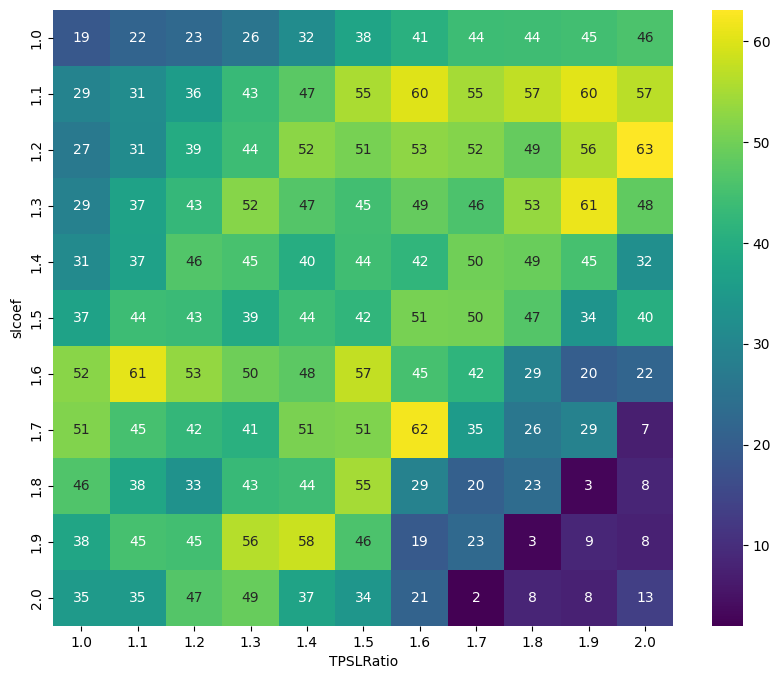

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()